In [1]:
%matplotlib inline


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
#NEWCOMMENTS
#Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


In [4]:
# Files to load
overall_homeless_data_to_load = "Resources/MD_County_Homeless.csv"
homeless_by_county__data_to_load = "Resources/MD_Homeless_PerCounty.csv"

In [5]:
# Read School and Student Data Files and store into Pandas DataFrames
overall_homeless_data = pd.read_csv(overall_homeless_data_to_load) 
homeless_by_county_data = pd.read_csv(homeless_by_county__data_to_load)


In [6]:
# Combine overall homeless and homeless by county data into a single dataset.  
homeless_data_complete = pd.merge(overall_homeless_data, homeless_by_county_data, how="left", on=["County_ID", "County_ID"])

homeless_data_complete

,County_ID,County_name,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Median_Household_Income,Med_HH_Income_Percent_of_State_Total,Overall Homeless 2019,Overall Homeless 2018,...,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Non-Hispanic,Overall Homeless - Hispanic/Latino,Overall Homeless - White,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
0,MD-500,Allegany County,"32,253","30,618","1,635",5.1,"48,170",55.6,145,79,...,98,47,145,0,119,14,0,0,0,12
1,MD-501,Baltimore city,"287,760","273,351","14,409",5.0,"49,780",57.5,"2,294","2,508",...,631,"1,660","2,234",60,602,"1,609",15,25,8,35
2,MD-502,Harford County,"143,572","138,927","4,645",3.2,"91,492",105.6,228,190,...,100,127,204,24,116,83,1,2,0,26
3,MD-503,Anne Arundel County,"321,069","311,556","9,513",3.0,"100,916",116.5,302,366,...,112,189,296,6,164,118,1,1,0,18
4,MD-504,Howard County,"191,529","186,427","5,102",2.7,"121,329",140.0,201,168,...,93,107,192,9,45,132,2,5,1,16
5,MD-505,Baltimore County,"459,091","442,597","16,494",3.6,"76,972",88.8,735,758,...,344,391,723,12,253,439,3,4,1,35
6,MD-506,Carroll County,"96,933","94,187","2,746",2.8,"101,810",117.5,144,173,...,57,84,141,3,111,15,0,2,0,16
7,MD-507,Cecil County,"53,891","51,812","2,079",3.9,"75,307",86.9,126,129,...,34,92,119,7,91,30,0,0,0,5
8,MD-508,"Charles, Calvert, St.Mary's Counties","65,682","63,492","2,190",3.0,"100,896",116.0,306,492,...,125,170,304,2,114,175,1,2,1,13
9,MD-509,Frederick County,"137,920","133,683","4,237",3.1,"102,951",118.8,286,316,...,82,204,272,14,183,81,2,0,0,20


In [7]:
#homeless_data_complete.columns

In [8]:
homeless_col=['Civilian_labor_force', 'Employed',
       'Unemployed', 'Unemployment_rate', 'Median_Household_Income',
       'Med_HH_Income_Percent_of_State_Total', 'Overall Homeless 2019',
       'Overall Homeless 2018', 'Overall Homeless 2017',
       'Overall Homeless 2016', 'Overall Homeless 2015',
       'Overall Homeless - Under 18 ', 'Overall Homeless - Age 18 to 24',
       'Overall Homeless - Over 24', 'Overall Homeless - Female',
       'Overall Homeless - Male', 'Overall Homeless - Non-Hispanic',
       'Overall Homeless - Hispanic/Latino', 'Overall Homeless - White',
       'Overall Homeless - Black or African American',
       'Overall Homeless - Asian',
       'Overall Homeless - American Indian or Alaska Native',
       'Overall Homeless - Native Hawaiian or Other Pacific Islander',
       'Overall Homeless - Multiple Races']

In [9]:
for i in homeless_col:
    try:
        #print(i)
        #print(homeless_data_complete[i])
        homeless_data_complete[i]= homeless_data_complete[i].str.replace(',', '').astype(float)
    
    except:
        #print("Error")
        pass
    

In [10]:
homeless_data_complete.head()

,County_ID,County_name,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Median_Household_Income,Med_HH_Income_Percent_of_State_Total,Overall Homeless 2019,Overall Homeless 2018,...,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Non-Hispanic,Overall Homeless - Hispanic/Latino,Overall Homeless - White,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
0,MD-500,Allegany County,32253.0,30618.0,1635.0,5.1,48170.0,55.6,145.0,79.0,...,98,47.0,145.0,0,119,14.0,0,0,0,12
1,MD-501,Baltimore city,287760.0,273351.0,14409.0,5.0,49780.0,57.5,2294.0,2508.0,...,631,1660.0,2234.0,60,602,1609.0,15,25,8,35
2,MD-502,Harford County,143572.0,138927.0,4645.0,3.2,91492.0,105.6,228.0,190.0,...,100,127.0,204.0,24,116,83.0,1,2,0,26
3,MD-503,Anne Arundel County,321069.0,311556.0,9513.0,3.0,100916.0,116.5,302.0,366.0,...,112,189.0,296.0,6,164,118.0,1,1,0,18
4,MD-504,Howard County,191529.0,186427.0,5102.0,2.7,121329.0,140.0,201.0,168.0,...,93,107.0,192.0,9,45,132.0,2,5,1,16


In [11]:
df1 = homeless_data_complete[["County_name","Overall Homeless - White","Overall Homeless - Black or African American","Overall Homeless - Asian","Overall Homeless - American Indian or Alaska Native","Overall Homeless - Native Hawaiian or Other Pacific Islander","Overall Homeless - Multiple Races"]]

In [12]:
df1.head()

,County_name,Overall Homeless - White,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races
0,Allegany County,119,14.0,0,0,0,12
1,Baltimore city,602,1609.0,15,25,8,35
2,Harford County,116,83.0,1,2,0,26
3,Anne Arundel County,164,118.0,1,1,0,18
4,Howard County,45,132.0,2,5,1,16


Text(0, 0.5, '# of Homeless')

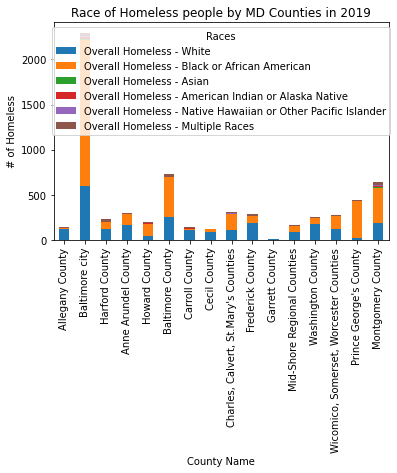

In [13]:
# plot data in stack manner of bar type
df1.plot(x='County_name', kind='bar', stacked=True,
        title='Race of Homeless people by MD Counties in 2019').legend(loc='upper center', title="Races")
plt.xlabel("County Name")
plt.ylabel("# of Homeless")
#plt.savefig("Resources/Race of Homeless people by MD Counties in 2019.png")

In [14]:
labels = "White", "Asian", "Black or African American",  "Native Hawaiian or Other Pacific Islander",   "Multiple Race", "American Indian or Alaska Native",
colors = ["red", "blue", "lightgreen", "pink", "purple","orange"]


In [15]:
#BlackN = int(homeless_data_complete["Overall Homeless - Black or African American"])

White = homeless_data_complete["Overall Homeless - White"].sum()
Black = homeless_data_complete["Overall Homeless - Black or African American"].sum()
Asian = homeless_data_complete["Overall Homeless - Asian"].sum()
AmerInd = homeless_data_complete["Overall Homeless - American Indian or Alaska Native"].sum()
NatHaw = homeless_data_complete["Overall Homeless - Native Hawaiian or Other Pacific Islander"].sum()
MultiRace = homeless_data_complete["Overall Homeless - Multiple Races"].sum()



<Figure size 1080x216 with 0 Axes>

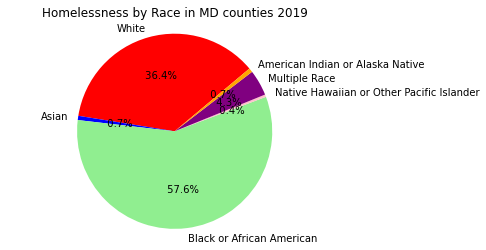

In [16]:
homelessMD = [White, Asian, Black, NatHaw, MultiRace, AmerInd]

plt.figure(figsize = (15,3))
fig1, ax1 = plt.subplots()

ax1.pie(homelessMD, labels=labels, colors=colors, radius=20, autopct='%5.1f%%', startangle=40, shadow=False)

ax1.axis('equal')
plt.title("Homelessness by Race in MD counties 2019")
#plt.savefig("Resources/Homeless by MD counties - pie.png")
plt.show()

In [17]:
# Create DataFrame using Overall Homeless by year with counties
overall_homeless_year = pd.DataFrame(homeless_data_complete, columns=["County_name", "County_ID", "Overall Homeless 2015", 
                                                                      "Overall Homeless 2016", "Overall Homeless 2017", 
                                                                      "Overall Homeless 2018", "Overall Homeless 2019"])

overall_homeless_year 

,County_name,County_ID,Overall Homeless 2015,Overall Homeless 2016,Overall Homeless 2017,Overall Homeless 2018,Overall Homeless 2019
0,Allegany County,MD-500,96.0,124.0,118.0,79.0,145.0
1,Baltimore city,MD-501,2796.0,2725.0,2669.0,2508.0,2294.0
2,Harford County,MD-502,210.0,179.0,189.0,190.0,228.0
3,Anne Arundel County,MD-503,335.0,390.0,376.0,366.0,302.0
4,Howard County,MD-504,166.0,214.0,168.0,168.0,201.0
5,Baltimore County,MD-505,745.0,763.0,609.0,758.0,735.0
6,Carroll County,MD-506,140.0,136.0,147.0,173.0,144.0
7,Cecil County,MD-507,191.0,167.0,193.0,129.0,126.0
8,"Charles, Calvert, St.Mary's Counties",MD-508,981.0,464.0,419.0,492.0,306.0
9,Frederick County,MD-509,311.0,349.0,309.0,316.0,286.0


In [18]:
#Sum the Overall Homeless 2015-2019
md_2015 = overall_homeless_year["Overall Homeless 2015"].sum()
md_2016 = overall_homeless_year["Overall Homeless 2016"].sum()
md_2017 = overall_homeless_year["Overall Homeless 2017"].sum()
md_2018 = overall_homeless_year["Overall Homeless 2018"].sum()
md_2019 = overall_homeless_year["Overall Homeless 2019"].sum()

#Convert the overall homeless of MD into new dataframe
md_homeless = pd.DataFrame({"Homeless_md":[md_2015, md_2016, md_2017, md_2018, md_2019], "Year": [2015,2016,2017,2018,2019]})
md_homeless

,Homeless_md,Year
0,8390.0,2015
1,7689.0,2016
2,7247.0,2017
3,7144.0,2018
4,6561.0,2019


Text(0, 0.5, 'Number of Homeless')

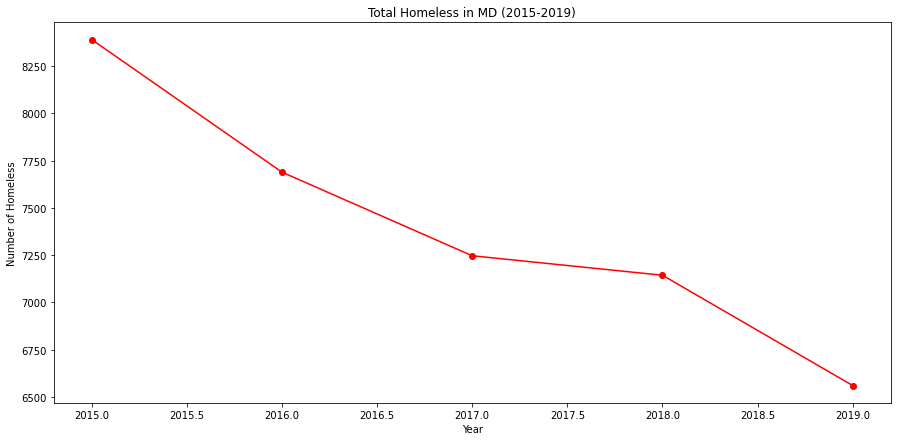

In [19]:
#Create line graph of total homelessness of MD by year
plt.figure(figsize=(15,7))
plt.plot(md_homeless["Year"], md_homeless["Homeless_md"], marker="o", color="red")

#Add labels
plt.title("Total Homeless in MD (2015-2019)")
plt.xlabel("Year")
plt.ylabel("Number of Homeless")

In [20]:
# Dataframe created of homeless per year and flip rows and columns. Index on top indicates county.
overall_homeless_year2 = pd.DataFrame(overall_homeless_year, columns=["Overall Homeless 2015", 
                                                                      "Overall Homeless 2016", "Overall Homeless 2017", 
                                                                      "Overall Homeless 2018", "Overall Homeless 2019"])

overall_homeless_year2 = overall_homeless_year2.transpose()

overall_homeless_year2.reset_index()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Overall Homeless 2015,96.0,2796.0,210.0,335.0,166.0,745.0,140.0,191.0,981.0,311.0,9.0,158.0,201.0,326.0,625.0,1100.0
1,Overall Homeless 2016,124.0,2725.0,179.0,390.0,214.0,763.0,136.0,167.0,464.0,349.0,20.0,138.0,233.0,262.0,544.0,981.0
2,Overall Homeless 2017,118.0,2669.0,189.0,376.0,168.0,609.0,147.0,193.0,419.0,309.0,10.0,153.0,208.0,260.0,525.0,894.0
3,Overall Homeless 2018,79.0,2508.0,190.0,366.0,168.0,758.0,173.0,129.0,492.0,316.0,15.0,141.0,199.0,292.0,478.0,840.0
4,Overall Homeless 2019,145.0,2294.0,228.0,302.0,201.0,735.0,144.0,126.0,306.0,286.0,12.0,164.0,249.0,275.0,447.0,647.0


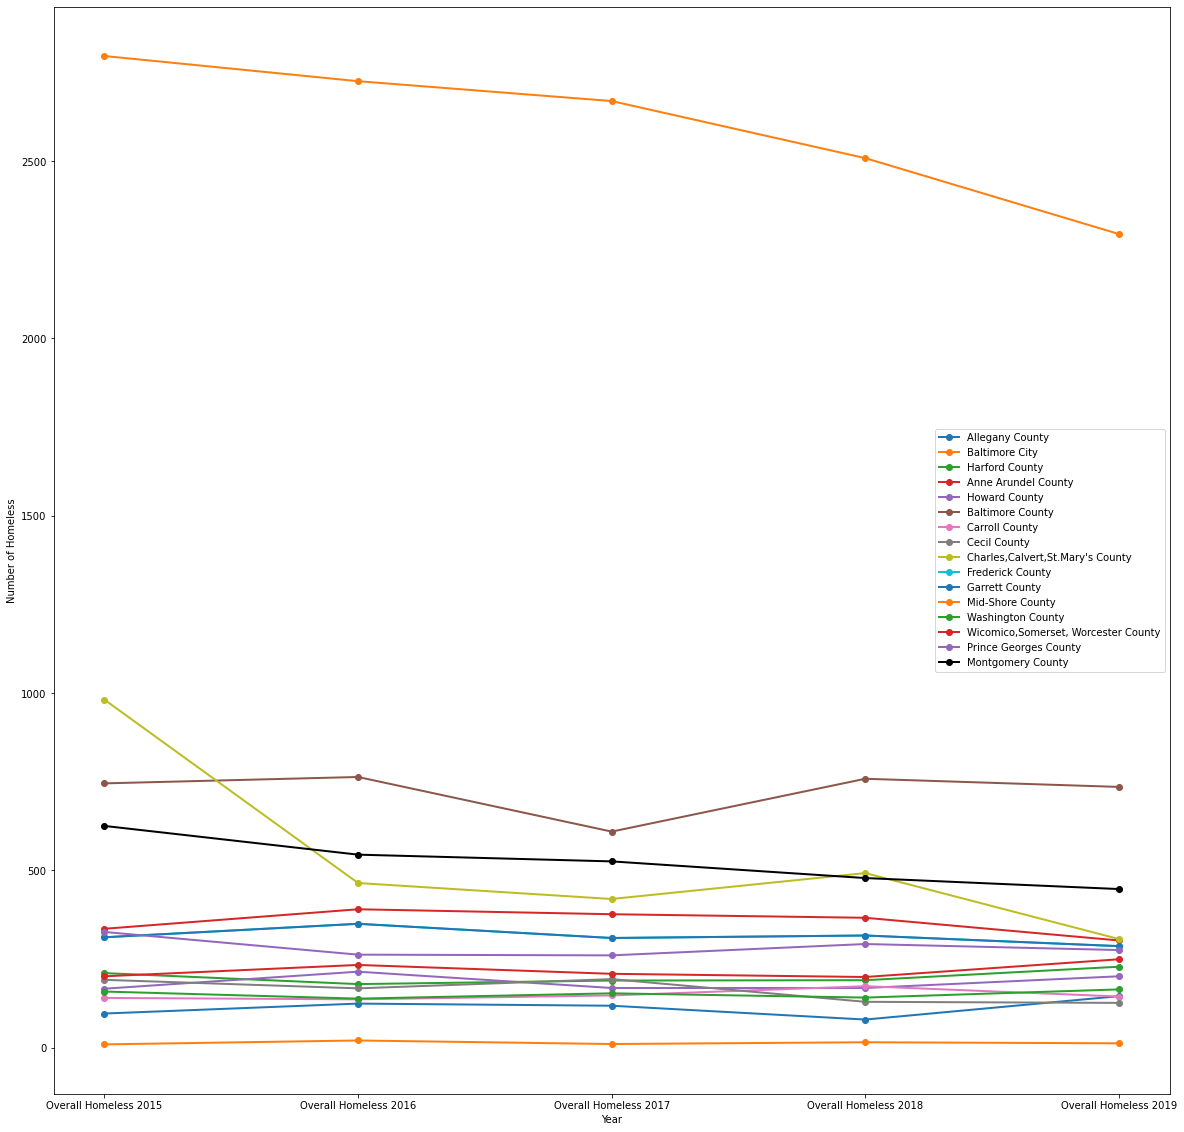

In [21]:
#Plot the homless from 2015-2019 by county
plt.figure(figsize=(20,20))
plt.plot(overall_homeless_year2[0], marker="o", linewidth="2", label="Allegany County")
plt.plot(overall_homeless_year2[1], marker="o", linewidth="2", label="Baltimore City")
plt.plot(overall_homeless_year2[2], marker="o", linewidth="2", label="Harford County")
plt.plot(overall_homeless_year2[3], marker="o", linewidth="2", label="Anne Arundel County")
plt.plot(overall_homeless_year2[4], marker="o", linewidth="2", label="Howard County")
plt.plot(overall_homeless_year2[5], marker="o", linewidth="2", label="Baltimore County")
plt.plot(overall_homeless_year2[6], marker="o", linewidth="2", label="Carroll County")
plt.plot(overall_homeless_year2[7], marker="o", linewidth="2", label="Cecil County")
plt.plot(overall_homeless_year2[8], marker="o", linewidth="2", label="Charles,Calvert,St.Mary's County")
plt.plot(overall_homeless_year2[9], marker="o", linewidth="2", label="Frederick County")
plt.plot(overall_homeless_year2[9], marker="o", linewidth="2", label="Garrett County")
plt.plot(overall_homeless_year2[10], marker="o", linewidth="2", label="Mid-Shore County")
plt.plot(overall_homeless_year2[11], marker="o", linewidth="2", label="Washington County")
plt.plot(overall_homeless_year2[12], marker="o", linewidth="2", label="Wicomico,Somerset, Worcester County")
plt.plot(overall_homeless_year2[13], marker="o", linewidth="2", label="Prince Georges County")
plt.plot(overall_homeless_year2[14], marker="o", color="black", linewidth="2", label="Montgomery County")

#Create labels and legend to know county
plt.xlabel("Year")
plt.ylabel("Number of Homeless")
plt.legend(loc="best")
plt.show()

In [ ]:
#homeless_data_complete.apply(lambda x: x.str.replace(',', '').astype(float), axis=1)

homeless_data_complete.head()

In [ ]:
values = homeless_data_complete[['County_name','Median_Household_Income','Unemployed']]

In [ ]:
counties = ["Allegany County", "Baltimore city", "Harford County", "Anne Arundel County", "Howard County", "Baltimore County", "Carroll County", "Cecil County", "Charles, Calvert, St.Mary's Counties", "Frederick County", "Garrett County", "Mid-Shore Regional Counties", "Washington County", "Wicomico, Somerset, Worcester Counties", "Prince George's County", "Montgomery County"]
Median_Household_income = [48170, 49780, 91492, 100916, 121329, 76972, 101810, 75307, 100896, 102951, 59253, 70306, 59785, 52968, 85357, 110012]
x_axis = np.arange(len(counties))

plt.bar(x_axis,Median_Household_income,color="b",align="center")

a = [b for b in x_axis]
plt.xticks(a,counties,rotation='vertical')

plt.xlim(-0.75,len(x_axis)-0.25)

#Set the limits of the y axis
plt.ylim(0,max(Median_Household_income)+0.4)

plt.title("Median Income for MD counties")
plt.xlabel("Counties")
plt.ylabel("Median Household Income in $")
plt.show()

In [ ]:
xcounties = ["Allegany County", "Baltimore city", "Harford County", "Anne Arundel County", "Howard County", "Baltimore County", "Carroll County", "Cecil County", "Charles, Calvert, St.Mary's Counties", "Frederick County", "Garrett County", "Mid-Shore Regional Counties", "Washington County", "Wicomico, Somerset, Worcester Counties", "Prince George's County", "Montgomery County"]
yMedian_Household_income = [48170, 49780, 91492, 100916, 121329, 76972, 101810, 75307, 100896, 102951, 59253, 70306, 59785, 52968, 85357, 110012]
y2Unemployed = [1635, 14409, 4645, 9513, 5102, 16494, 2746, 2079, 2190, 4237, 680, 654, 2846, 1588, 18814, 16167]

fig, ax1 = plt.subplots()
ax1.plot(xcounties, yMedian_Household_income, 'g-' )

ax1.set_xlabel('Counties')
ax1.set_ylabel('Median Household Income in $', color='g')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
ax2.plot(xcounties, y2Unemployed, 'b-')
ax2.set_ylabel('Number of Unemployed', color='b')
plt.show()